In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("C:/Users/Lenovo/Desktop/work with kaggle/New folder (2)/electricityconsumptionbenchmarkssurveydataaergovhack.csv",parse_dates=[2])

# Description
Electricity consumption benchmarks – Survey responses matched with household consumption data for 25 households

The AER is required to update electricity consumption benchmarks (available on www.energymadeeasy.gov.au) at least every three years. The benchmarks were initially developed in 2011. The update of the benchmarks is currently being undertaken, and this is a small subset of the data. Once the study is finalised, the whole dataset will be made available via www.data.gov.au.

This data is made up of two elements:

1.Responses to a survey from 25 Victorian householders about their energy consumption (shown in the tab ‘questionnaire responses’).

2.Energy consumption data (in Watt Hours (WH)) for each household in the sample from 1 April 2012 to 31 March 2014 (or such time as data are available after the installation of a smart meter). E_0000_WH refers to WH usage in the half hour commencing 12am. The column TYPE shows the type of usage. There are three types – general, controlled load (where the household has a dedicated circuit for a specific appliance, such as hot water) and generation (where the household has solar panels, this shows the WH exported to the grid from the solar panels - note that electricity generated and used within the house is not measured).

In [3]:
data.head()

,respondent,OUTPUT_DATE,TYPE,E_0000_WH,E_0030_WH,E_0100_WH,E_0130_WH,E_0200_WH,E_0230_WH,E_0300_WH,...,E_1900_WH,E_1930_WH,E_2000_WH,E_2030_WH,E_2100_WH,E_2130_WH,E_2200_WH,E_2230_WH,E_2300_WH,E_2330_WH
0,8927,1/04/2012,general,426,396,340,392,348,378,362,...,828,760,918,756,898,1228,710,1048,674,1528
1,8927,2/04/2012,general,1872,1920,1620,304,230,268,198,...,402,410,350,398,380,1018,1994,1584,1390,1018
2,8927,3/04/2012,general,766,528,320,474,384,338,326,...,926,1180,1122,1266,524,814,756,1610,1436,512
3,8927,4/04/2012,general,696,546,408,390,362,384,186,...,566,456,418,406,354,592,1354,970,874,850
4,8927,5/04/2012,general,632,490,506,330,364,308,352,...,192,218,172,528,950,982,1134,764,512,758


In [4]:
data.shape

(22952, 51)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22952 entries, 0 to 22951
Data columns (total 51 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   respondent   22952 non-null  int64 
 1   OUTPUT_DATE  22952 non-null  object
 2   TYPE         22952 non-null  object
 3   E_0000_WH    22952 non-null  int64 
 4   E_0030_WH    22952 non-null  int64 
 5   E_0100_WH    22952 non-null  int64 
 6   E_0130_WH    22952 non-null  int64 
 7   E_0200_WH    22952 non-null  int64 
 8   E_0230_WH    22952 non-null  int64 
 9   E_0300_WH    22952 non-null  int64 
 10  E_0330_WH    22952 non-null  int64 
 11  E_0400_WH    22952 non-null  int64 
 12  E_0430_WH    22952 non-null  int64 
 13  E_0500_WH    22952 non-null  int64 
 14  E_0530_WH    22952 non-null  int64 
 15  E_0600_WH    22952 non-null  int64 
 16  E_0630_WH    22952 non-null  int64 
 17  E_0700_WH    22952 non-null  int64 
 18  E_0730_WH    22952 non-null  int64 
 19  E_0800_WH    22952 non-nu

In [6]:
data.isna().sum()

respondent     0
OUTPUT_DATE    0
TYPE           0
E_0000_WH      0
E_0030_WH      0
E_0100_WH      0
E_0130_WH      0
E_0200_WH      0
E_0230_WH      0
E_0300_WH      0
E_0330_WH      0
E_0400_WH      0
E_0430_WH      0
E_0500_WH      0
E_0530_WH      0
E_0600_WH      0
E_0630_WH      0
E_0700_WH      0
E_0730_WH      0
E_0800_WH      0
E_0830_WH      0
E_0900_WH      0
E_0930_WH      0
E_1000_WH      0
E_1030_WH      0
E_1100_WH      0
E_1130_WH      0
E_1200_WH      0
E_1230_WH      0
E_1300_WH      0
E_1330_WH      0
E_1400_WH      0
E_1430_WH      0
E_1500_WH      0
E_1530_WH      0
E_1600_WH      0
E_1630_WH      0
E_1700_WH      0
E_1730_WH      0
E_1800_WH      0
E_1830_WH      0
E_1900_WH      0
E_1930_WH      0
E_2000_WH      0
E_2030_WH      0
E_2100_WH      0
E_2130_WH      0
E_2200_WH      0
E_2230_WH      0
E_2300_WH      0
E_2330_WH      0
dtype: int64

In [7]:
data.columns

Index(['respondent', 'OUTPUT_DATE', 'TYPE', 'E_0000_WH', 'E_0030_WH',
       'E_0100_WH', 'E_0130_WH', 'E_0200_WH', 'E_0230_WH', 'E_0300_WH',
       'E_0330_WH', 'E_0400_WH', 'E_0430_WH', 'E_0500_WH', 'E_0530_WH',
       'E_0600_WH', 'E_0630_WH', 'E_0700_WH', 'E_0730_WH', 'E_0800_WH',
       'E_0830_WH', 'E_0900_WH', 'E_0930_WH', 'E_1000_WH', 'E_1030_WH',
       'E_1100_WH', 'E_1130_WH', 'E_1200_WH', 'E_1230_WH', 'E_1300_WH',
       'E_1330_WH', 'E_1400_WH', 'E_1430_WH', 'E_1500_WH', 'E_1530_WH',
       'E_1600_WH', 'E_1630_WH', 'E_1700_WH', 'E_1730_WH', 'E_1800_WH',
       'E_1830_WH', 'E_1900_WH', 'E_1930_WH', 'E_2000_WH', 'E_2030_WH',
       'E_2100_WH', 'E_2130_WH', 'E_2200_WH', 'E_2230_WH', 'E_2300_WH',
       'E_2330_WH'],
      dtype='object')

In [8]:
data.TYPE.value_counts()

general            17410
controlled load     4082
generation          1460
Name: TYPE, dtype: int64

In [9]:
data.respondent.value_counts()

17625    2190
3117     1460
18272    1382
6463     1382
1858     1356
7583     1302
8099     1282
3762      730
8927      730
4192      730
3494      730
9918      730
1098      730
2447      729
5726      720
6520      720
5636      720
1151      719
10746     712
12736     701
6460      673
4119      672
16163     662
16619     643
1569      547
Name: respondent, dtype: int64

In [10]:
data1=data.drop(['respondent', 'OUTPUT_DATE', 'TYPE'],axis=1)

In [11]:
a=data1.sum(axis=1)
a.to_frame()

,0
0,25356
1,24486
2,26344
3,17940
4,22286
...,...
22947,6775
22948,5026
22949,9319
22950,4203


In [12]:
#con_energy=consumption of energy in 24 hours per day
data["con_energy"]=a.to_frame(name="con_energy")

In [13]:
data

,respondent,OUTPUT_DATE,TYPE,E_0000_WH,E_0030_WH,E_0100_WH,E_0130_WH,E_0200_WH,E_0230_WH,E_0300_WH,...,E_1930_WH,E_2000_WH,E_2030_WH,E_2100_WH,E_2130_WH,E_2200_WH,E_2230_WH,E_2300_WH,E_2330_WH,con_energy
0,8927,1/04/2012,general,426,396,340,392,348,378,362,...,760,918,756,898,1228,710,1048,674,1528,25356
1,8927,2/04/2012,general,1872,1920,1620,304,230,268,198,...,410,350,398,380,1018,1994,1584,1390,1018,24486
2,8927,3/04/2012,general,766,528,320,474,384,338,326,...,1180,1122,1266,524,814,756,1610,1436,512,26344
3,8927,4/04/2012,general,696,546,408,390,362,384,186,...,456,418,406,354,592,1354,970,874,850,17940
4,8927,5/04/2012,general,632,490,506,330,364,308,352,...,218,172,528,950,982,1134,764,512,758,22286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22947,6460,27/03/2014,general,16,49,50,26,39,44,40,...,87,60,80,87,66,53,80,78,33,6775
22948,6460,28/03/2014,general,40,54,37,41,41,41,47,...,182,61,119,93,54,53,48,45,57,5026
22949,6460,29/03/2014,general,49,36,53,57,32,47,57,...,238,193,64,196,86,40,51,37,38,9319
22950,6460,30/03/2014,general,43,49,28,39,50,38,25,...,146,67,185,99,85,50,46,64,51,4203


In [126]:
df=data.drop(data1,axis=1)

In [127]:
df

,respondent,OUTPUT_DATE,TYPE,con_energy
0,8927,1/04/2012,general,25356
1,8927,2/04/2012,general,24486
2,8927,3/04/2012,general,26344
3,8927,4/04/2012,general,17940
4,8927,5/04/2012,general,22286
...,...,...,...,...
22947,6460,27/03/2014,general,6775
22948,6460,28/03/2014,general,5026
22949,6460,29/03/2014,general,9319
22950,6460,30/03/2014,general,4203


In [128]:
#df.set_index(["OUTPUT_DATE"],inplace=True)

In [129]:
df

,respondent,OUTPUT_DATE,TYPE,con_energy
0,8927,1/04/2012,general,25356
1,8927,2/04/2012,general,24486
2,8927,3/04/2012,general,26344
3,8927,4/04/2012,general,17940
4,8927,5/04/2012,general,22286
...,...,...,...,...
22947,6460,27/03/2014,general,6775
22948,6460,28/03/2014,general,5026
22949,6460,29/03/2014,general,9319
22950,6460,30/03/2014,general,4203


In [130]:
data.TYPE.value_counts(ascending=False)

general            17410
controlled load     4082
generation          1460
Name: TYPE, dtype: int64

In [131]:
df["TYPE"].replace({"general":0,"controlled load":1,"generation":2},inplace=True)


In [132]:
df

,respondent,OUTPUT_DATE,TYPE,con_energy
0,8927,1/04/2012,0,25356
1,8927,2/04/2012,0,24486
2,8927,3/04/2012,0,26344
3,8927,4/04/2012,0,17940
4,8927,5/04/2012,0,22286
...,...,...,...,...
22947,6460,27/03/2014,0,6775
22948,6460,28/03/2014,0,5026
22949,6460,29/03/2014,0,9319
22950,6460,30/03/2014,0,4203


In [133]:
df[df["TYPE"]==0].value_counts(ascending=False)

respondent  OUTPUT_DATE  TYPE  con_energy
1098        1/01/2013    0     4929          1
8099        28/09/2013   0     11618         1
            28/12/2013   0     3099          1
            28/12/2012   0     4826          1
            28/11/2013   0     7938          1
                                            ..
4119        18/11/2012   0     7975          1
            18/11/2013   0     4413          1
            18/12/2012   0     6829          1
            18/12/2013   0     4521          1
18272       9/12/2013    0     6850          1
Length: 17410, dtype: int64

In [134]:
b=a.to_frame(name="con_energy")
b
#b.set_index("con_energy",inplace=True)

,con_energy
0,25356
1,24486
2,26344
3,17940
4,22286
...,...
22947,6775
22948,5026
22949,9319
22950,4203


In [135]:
df

,respondent,OUTPUT_DATE,TYPE,con_energy
0,8927,1/04/2012,0,25356
1,8927,2/04/2012,0,24486
2,8927,3/04/2012,0,26344
3,8927,4/04/2012,0,17940
4,8927,5/04/2012,0,22286
...,...,...,...,...
22947,6460,27/03/2014,0,6775
22948,6460,28/03/2014,0,5026
22949,6460,29/03/2014,0,9319
22950,6460,30/03/2014,0,4203


In [136]:
compare=df[df.respondent < df.con_energy]

In [137]:
compare.TYPE.value_counts()

0    12223
1      587
2      177
Name: TYPE, dtype: int64

In [138]:
#"general":0,"controlled load":1,"generation":2
df.TYPE.value_counts()

0    17410
1     4082
2     1460
Name: TYPE, dtype: int64

In [139]:
compare1=df[df.respondent > df.con_energy]

In [140]:
compare1.TYPE.value_counts()

0    5184
1    3495
2    1283
Name: TYPE, dtype: int64

# conclustion

in "compare" dataframe we see that in 12223 items from type 0 respondent>consumption_energy that Respectively after type0 is type1 and type2

Energy consumption in this case(type1) is much higher than what expected.
because of that after comparing the two dataframes (compare1 and compare) we are going to predict that in the future people will use which type of energy (consumption) that makes them satisfied. 

in "compare1"dataframe we see that in 5184 items from type 0 respondent>consumption_energy that Respectively after type0 is type1 and type2 but in this situation we see that the difference between these three items are less than the last dataframe 
 and that means consumption of energy is really deffrent form one type to another type

In [144]:
compare

,respondent,OUTPUT_DATE,TYPE,con_energy
0,8927,1/04/2012,0,25356
1,8927,2/04/2012,0,24486
2,8927,3/04/2012,0,26344
3,8927,4/04/2012,0,17940
4,8927,5/04/2012,0,22286
...,...,...,...,...
22941,6460,21/03/2014,0,8206
22943,6460,23/03/2014,0,6631
22945,6460,25/03/2014,0,11197
22947,6460,27/03/2014,0,6775


In [146]:
df["comparison"]=df["con_energy"]-df["respondent"]

In [147]:
df

,respondent,OUTPUT_DATE,TYPE,con_energy,comparison
0,8927,1/04/2012,0,25356,16429
1,8927,2/04/2012,0,24486,15559
2,8927,3/04/2012,0,26344,17417
3,8927,4/04/2012,0,17940,9013
4,8927,5/04/2012,0,22286,13359
...,...,...,...,...,...
22947,6460,27/03/2014,0,6775,315
22948,6460,28/03/2014,0,5026,-1434
22949,6460,29/03/2014,0,9319,2859
22950,6460,30/03/2014,0,4203,-2257


<AxesSubplot:>

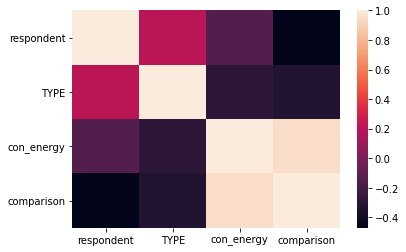

In [148]:
corr=df.corr()
sns.heatmap(corr)

In [149]:
df

,respondent,OUTPUT_DATE,TYPE,con_energy,comparison
0,8927,1/04/2012,0,25356,16429
1,8927,2/04/2012,0,24486,15559
2,8927,3/04/2012,0,26344,17417
3,8927,4/04/2012,0,17940,9013
4,8927,5/04/2012,0,22286,13359
...,...,...,...,...,...
22947,6460,27/03/2014,0,6775,315
22948,6460,28/03/2014,0,5026,-1434
22949,6460,29/03/2014,0,9319,2859
22950,6460,30/03/2014,0,4203,-2257


In [150]:
features=["respondent","con_energy","comparison"]
target="TYPE"

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [154]:
model=LogisticRegression()

In [155]:
model

LogisticRegression()

In [156]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.33, random_state=42)

In [157]:
model.fit(X_train,y_train)

LogisticRegression()

In [159]:
prediction=model.predict(X_test)

In [160]:
prediction

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [161]:
y_test=y_test.to_frame("real")

In [162]:
y_test["prediction"]=prediction

In [163]:
y_test

,real,prediction
19957,0,0
7729,0,0
21142,1,1
3125,0,0
10753,1,1
...,...,...
10791,1,1
6220,0,0
19105,0,0
18491,0,0


In [164]:
from sklearn.metrics import mean_squared_error

In [165]:
mean_squared_error(y_test['real'], y_test['prediction']) ** 0.5

0.5107426806216422

In [168]:
from sklearn.metrics import accuracy_score

In [169]:
 accuracy_score(y_test['real'],y_test['prediction'])

0.8215181518151815